In [6]:
import pandas as pd
import os

In [8]:
curr_dir = os.getcwd()
curr_dir

'C:\\Users\\User\\Documents\\Ruppin\\Domino Project'

In [9]:
images_path = os.path.join(curr_dir, "images")

In [10]:
image1_path = os.path.join(images_path, "20240926_210622.jpg")
image1_path

'C:\\Users\\User\\Documents\\Ruppin\\Domino Project\\images\\20240926_210622.jpg'

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [29]:

# Function to display images
def display_image(title, image, cmap='gray'):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()




In [61]:
def count_pips(image_path, to_resize = True, blob_min_area=200):
    
    # read the image
    image = cv2.imread(image_path)
    
    # reduce scale
    if to_resize:
        scale_percent = 25
        image = resize_image(image, scale_percent)
    
    # convert to grey scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # count pips
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = blob_min_area
    blob_detector = cv2.SimpleBlobDetector_create(params)
    keypoints = blob_detector.detect(gray)
    
    return len(keypoints)
    

In [65]:
images_dict = {
    "20240926_210622.jpg": 68,
    "20240926_210644.jpg": 68,
    "20240926_210659.jpg": 51,
    "20240926_210720.jpg": 73,
}

In [76]:
blob_min_area = 50

for image_path, answer in images_dict.items():
    full_path = os.path.join(images_path, image_path)
    print(image_path)
    pip_count = count_pips(full_path, blob_min_area=blob_min_area)
    print(f"pip count is {pip_count}, right count is {answer}, diff is {pip_count-answer}")


20240926_210622.jpg
pip count is 68, right count is 68, diff is 0
20240926_210644.jpg
pip count is 68, right count is 68, diff is 0
20240926_210659.jpg
pip count is 36, right count is 51, diff is -15
20240926_210720.jpg
pip count is 52, right count is 73, diff is -21


In [ ]:
#todo:

# use the "Improved Algorithm Using Real Tile Size:"  to calculate more accurately the min blob size and see if it affects the results 

# generate an initial dataset: for each domino 1 image from close and one from a distance (total of 136 dominoes x 2 images + 20 random mixed images > total of 156 images)

# resize each to 25% and transform to grey scale and save

# try to apply the simple algorithm

# try to run an out-of-the box CNN to predict

# which is better?


# explore image augmentation to improve the set


# repeat the prediction (naive model, cnn)

In [ ]:
# other ideas for projects:

# hate crimes in NY - what is the research question?

# identify the age of the person that write the text - requires dataset

# health questions 

In [22]:
# Load the uploaded image
image_path = image1_path
image = cv2.imread(image_path)



In [23]:
# Get the resolution
height, width = image.shape[:2]
print(f"Image Resolution: {width}x{height} pixels")

Image Resolution: 2252x4000 pixels


In [26]:
# Define a resizing function
def resize_image(image, scale_percent):
    # Calculate the new dimensions
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    new_dim = (width, height)

    # Resize the image
    resized_image = cv2.resize(image, new_dim, interpolation=cv2.INTER_AREA)
    return resized_image

# Set the scaling percentage (e.g., reduce size to 50% of the original)
scale_percent = 25  # Change this value to adjust how much you want to resize
resized_image = resize_image(image, scale_percent)

In [27]:
height_small, width_small = resized_image.shape[:2]
print(f"Image Resolution: {width_small}x{height_small} pixels")

Image Resolution: 563x1000 pixels


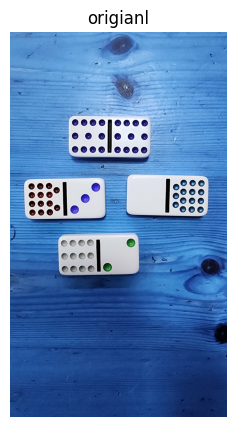

In [30]:
display_image("origianl", image)

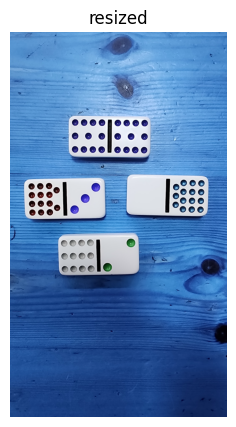

In [31]:
display_image("resized", resized_image)

In [32]:
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

In [33]:
# 1. Edge Detection (Canny)
edges = cv2.Canny(gray, 50, 150)


In [34]:

# 2. Contour Detection
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)


In [36]:

# 3. HOG Descriptor Setup
hog = cv2.HOGDescriptor()
hog_features = hog.compute(gray)

# Since direct visualization of HOG features is complex, here's how to summarize:
print(f"HOG Features Shape: {hog_features.shape}")


HOG Features Shape: (26195400,)


In [52]:

# 4. Blob Detection
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 1000
blob_detector = cv2.SimpleBlobDetector_create(params)
keypoints = blob_detector.detect(gray)
blob_img = cv2.drawKeypoints(image.copy(), keypoints, np.array([]), (0, 0, 255),
                             cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


In [53]:
# Summary of Detected Features
num_contours = len(contours)
num_blobs = len(keypoints)

num_contours, num_blobs

(863, 0)

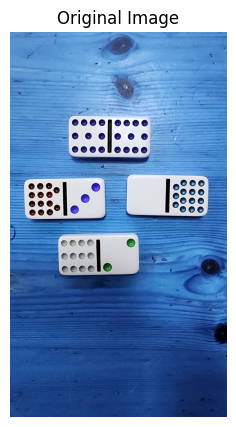

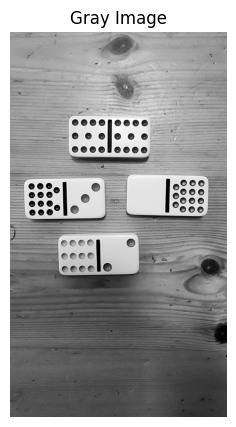

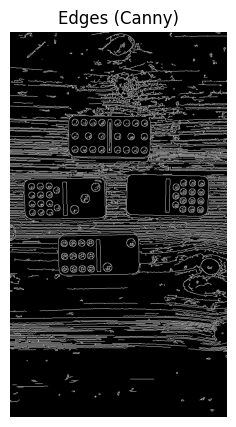

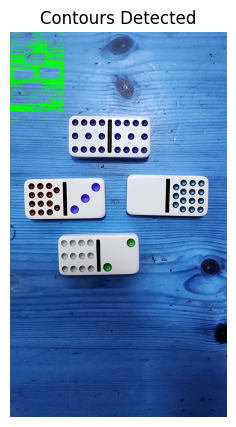

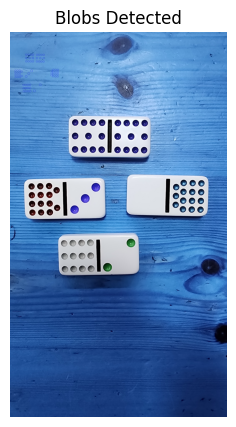

In [46]:

# Display the extracted features
display_image("Original Image", image, cmap='gray')
display_image("Gray Image", gray, cmap='gray')
display_image("Edges (Canny)", edges, cmap='gray')
display_image("Contours Detected", contour_img)
display_image("Blobs Detected", blob_img)

